In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [110]:
np.random.seed(9)

n = 100
X1 = [[1, 0],
      [-1, 0]]
X2 = [[0, 1],
      [0, -1]]

for _ in range((n - 4) / 2):
    s = np.array([np.random.uniform(1.01, 10), np.random.uniform(0, 0.999)])
    if np.random.uniform() > 0.5:
        s[0] = -s[0]
    if np.random.uniform() > 0.5:
        s[1] = -s[1]
        
    X1.append(s)

for _ in range((n - 4) / 2):
    s = np.array([np.random.uniform(0, 0.999), np.random.uniform(1.01, 10)])
    if np.random.uniform() > 0.5:
        s[0] = -s[0]
    if np.random.uniform() > 0.5:
        s[1] = -s[1]
    X2.append(s)

X1 = np.asarray(X1)
X2 = np.asarray(X2)
t = np.concatenate([[0] * len(X1), [1] * len(X2)])
X = np.concatenate([X1, X2])
assert len(X) == n, 'Length not 100'

<IPython.core.display.Javascript object>


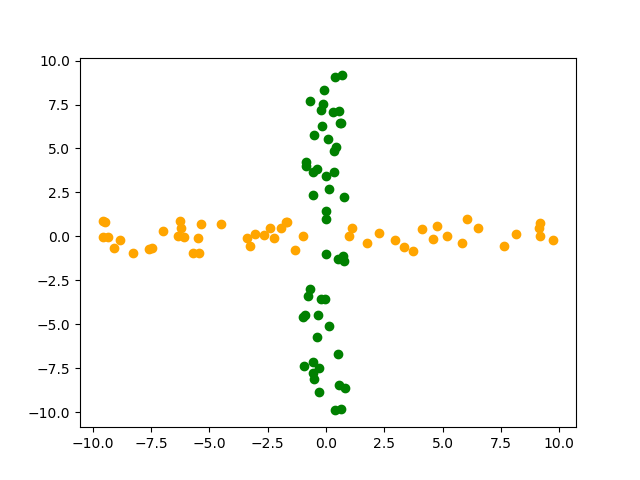

In [111]:
f = plt.figure()
ax = f.add_subplot(111)

ax.scatter(X1[:, 0], X1[:, 1], color='orange')
ax.scatter(X2[:, 0], X2[:, 1], color='green')

plt.show()

In [112]:
def sigmoid_no_beta(z):
    return 1. / (1+ np.exp(-z))

In [182]:
class Layer(object):
    def __init__(self, n_in, layer_size):
        self.W = np.random.rand(layer_size, n_in + 1)
#         self.deltas = np.zeros(layer_size, n_in + 1)
        self.activation = np.zeros(layer_size)
        self.learning_rate = 0.01
        
    def z(self, x):
        return np.dot(self.W, x)
    
    def a(self, x):
        res = sigmoid_no_beta(self.z(x))
        return res
    
    def forward(self, x):
        # b || x
        x_tilda = np.concatenate([[1.0], x])
        res = self.a(x_tilda)
        self.activations = res
        return res
    
    def backward(self, delta):
        delta = delta * self.grad()
        self.W += self.learning_rate * np.dot(self.W, delta)
        return delta
    
    def grad(self):
        return self.activations * (1 - self.activations)


class Net(object):
    def __init__(self, n_in):
        self.layers = [
            Layer(n_in, 2),  # Hidden layer
            Layer(2, 1)  # Output, a logistic regression fn
        ]

    def h(self, x):
        prev_out = x
        for l in self.layers:
            prev_out = l.forward(prev_out)
            
        return prev_out[0]
    
    def loss(self, y, t):
        return (y - t) ** 2
    
    def backwards(self, loss):
        for l in reversed(self.layers[:-1]):
            loss = l.backward(loss)
    
    def train_loop(self, X, t, epochs):
        # no batch
        for ep in range(epochs):
            loss = 0
            for x_i, t_i in  zip(X, t):
                y_i = self.h(x_i)
                loss += self.loss(y_i, t_i)
                self.backwards(loss)
            
            avg_loss = loss / len(X)
            print("Loss epoch={}:\t{}".format(ep, avg_loss))
            

In [183]:
l = Layer(2, 2)

In [184]:
l.forward([-1, 0.5])

array([0.44690107, 0.62541689])

In [185]:
o = Layer(2, 1)

In [186]:
o.forward(l.forward([-1, 0.5]))

array([0.7431609])

In [187]:
o.W

array([[0.47826821, 0.2432743 , 0.76025288]])

In [188]:
F = Net(2)

In [189]:
F.h([0, 1])

0.6878570880747502

In [190]:
F.train_loop(X, t, 15)

ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)